In [30]:
import uuid
from uuid import UUID
import random
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import itertools

In [2]:
class GenomeSimulator:
    def __init__(self):
        self.generation = 1
        self.people = dict()
    
    def setup(self, population=32):
        for _ in range(population):
            value = uuid.uuid4()
            self.people[value] = {'name':value,
                                  'genome': [value] * 20_000,
                                  'generation': self.generation,
                                  'sex':random.randint(0,1),
                                  'birth_year':random.randint(0,10)+1800,
                                  'partner': None,
                                  'parents': None}
            
    def make_partners(self):
        self.generation += 1
        candidates = {key:value for key, value in self.people.items() if value['partner'] is None}
        males = {key:value for key, value in candidates.items() if value['sex'] == 1}
        females = {key:value for key, value in candidates.items() if value['sex'] == 0}
        for count in range(min([len(males),len(females)])):
            for child in range(1,4):
                genome = []
                father = list(males.values())[count]
                mother = list(females.values())[count]
                candidates[father['name']]['partner'] = mother['name']
                candidates[mother['name']]['partner'] = father['name']
                similarity = 0
                for gene in range(20_000):
                    if father['genome'][gene] == mother['genome'][gene]:
                        similarity += 1
                    if random.randint(0,1) == 0:
                        genome.append(father['genome'][gene])
                    else:
                        genome.append(mother['genome'][gene])
                
                if similarity > 200:
                    break
                new_name = uuid.uuid4()
                birth_year = max(father['birth_year'], mother['birth_year']) + random.randint(20,35)
                self.people[new_name] = {'name':new_name,
                                         'genome': genome,
                                         'generation': generation,
                                         'sex': random.randint(0,1),
                                         'birth_year': birth_year,
                                         'partner': None,
                                         'parents':[father['name'],mother['name']]}

In [3]:
def genome_similarity(person_a, person_b):
    matching = 0
    for gene in range(20_000):
        if person_a['genome'][gene] == person_b['genome'][gene]:
            matching += 1
    return matching / 20_000 * 100

In [4]:
simulation = GenomeSimulator()
simulation.setup(population=64)
len(simulation.people.items())

64

In [5]:
for generation in range(1,20):
    simulation.make_partners()
    print("generation %s: %s" % (generation, datetime.now()))

generation 1: 2023-05-25 15:57:54.270964
generation 2: 2023-05-25 15:57:56.654600
generation 3: 2023-05-25 15:57:59.542260
generation 4: 2023-05-25 15:58:02.253763
generation 5: 2023-05-25 15:58:03.831385
generation 6: 2023-05-25 15:58:04.217003
generation 7: 2023-05-25 15:58:04.217132
generation 8: 2023-05-25 15:58:04.217165
generation 9: 2023-05-25 15:58:04.217193
generation 10: 2023-05-25 15:58:04.217221
generation 11: 2023-05-25 15:58:04.217249
generation 12: 2023-05-25 15:58:04.217280
generation 13: 2023-05-25 15:58:04.217307
generation 14: 2023-05-25 15:58:04.217338
generation 15: 2023-05-25 15:58:04.217366
generation 16: 2023-05-25 15:58:04.217393
generation 17: 2023-05-25 15:58:04.217424
generation 18: 2023-05-25 15:58:04.217454
generation 19: 2023-05-25 15:58:04.217481


In [6]:
len(simulation.people)

583

In [7]:
Counter([x['sex'] for x in simulation.people.values()])

Counter({1: 290, 0: 293})

In [8]:
Counter([x['sex'] for x in simulation.people.values() if x['partner'] is None])

Counter({0: 3})

In [9]:
simulation.generation

20

In [10]:
list(simulation.people.values())[-1]

{'name': UUID('6b0f0a6a-0f6f-45ad-a26d-b23f16a0efca'),
 'genome': [UUID('f2734af7-29fb-4c46-86fe-8b28de7a58a4'),
  UUID('a70a8753-d090-4878-bdf2-85d19446ed12'),
  UUID('7ec9f8dc-e7f5-4e0a-9267-9f5407bb0331'),
  UUID('3ff325db-fc0a-40c9-8ff5-6fb70463895b'),
  UUID('f2734af7-29fb-4c46-86fe-8b28de7a58a4'),
  UUID('f2734af7-29fb-4c46-86fe-8b28de7a58a4'),
  UUID('93f85da6-3ddd-4f0d-bff9-7f64353b55be'),
  UUID('2353127d-9cb0-489c-82be-c26d47b2087d'),
  UUID('f2734af7-29fb-4c46-86fe-8b28de7a58a4'),
  UUID('a34c33ab-ce98-4abb-b5ac-99359ac963cb'),
  UUID('93f85da6-3ddd-4f0d-bff9-7f64353b55be'),
  UUID('da818ca9-7fb7-45fb-81cb-584da631d6ce'),
  UUID('17842ba5-1c3a-4fbe-9eb6-bc67c3db90f9'),
  UUID('92390fcd-e7e6-4083-916f-aab902e3216b'),
  UUID('d9c56d9c-2b29-4788-8647-bbf922792cd3'),
  UUID('92390fcd-e7e6-4083-916f-aab902e3216b'),
  UUID('e8aa9149-361e-468b-a6cf-46b3401d1b5d'),
  UUID('fdb61ed1-8184-4c89-9a55-1fe437cb7a41'),
  UUID('a4e3ce08-538c-44ec-a6d8-529bbe102526'),
  UUID('e8aa9149-361e-4

In [11]:
l1 = []
count = 0
for item in simulation.people.values():
    if item['genome'] not in l1:
        count += 1
        l1.append(item['genome'])

In [12]:
count

583

In [13]:
len(simulation.people)

583

In [14]:
unpartnered = pd.DataFrame(Counter([x['birth_year'] for x in simulation.people.values() if x['partner'] is None]).items()).sort_values(1)

In [15]:
unpartnered.sort_values(0)

,0,1
1,1950,1
2,1954,1
0,1955,1


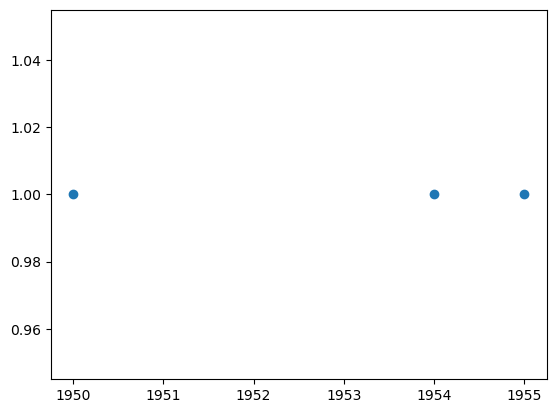

In [16]:
plt.scatter(x=unpartnered[0], y=unpartnered[1])

In [17]:
Counter([x['generation'] for x in simulation.people.values() if x['partner'] is None])

Counter({5: 3})

In [18]:
datetime.now()

datetime.datetime(2023, 5, 25, 15, 58, 4, 479441)

In [19]:
Counter([x['generation'] for x in simulation.people.values()])

Counter({1: 154, 2: 129, 3: 150, 4: 108, 5: 42})

In [20]:
last_generation = [x['name'] for x in simulation.people.values() if x['generation'] == 4]

In [22]:
people = pd.DataFrame(simulation.people).transpose()
people

,name,genome,generation,sex,birth_year,partner,parents
b770fbd2-04cb-4222-b91b-8ffb9a7fbe18,b770fbd2-04cb-4222-b91b-8ffb9a7fbe18,"[b770fbd2-04cb-4222-b91b-8ffb9a7fbe18, b770fbd...",1,1,1802,92390fcd-e7e6-4083-916f-aab902e3216b,None
92390fcd-e7e6-4083-916f-aab902e3216b,92390fcd-e7e6-4083-916f-aab902e3216b,"[92390fcd-e7e6-4083-916f-aab902e3216b, 92390fc...",1,0,1807,b770fbd2-04cb-4222-b91b-8ffb9a7fbe18,None
59ceaa4c-9adc-492f-a6a2-451b03c6da6b,59ceaa4c-9adc-492f-a6a2-451b03c6da6b,"[59ceaa4c-9adc-492f-a6a2-451b03c6da6b, 59ceaa4...",1,0,1803,2353127d-9cb0-489c-82be-c26d47b2087d,None
2353127d-9cb0-489c-82be-c26d47b2087d,2353127d-9cb0-489c-82be-c26d47b2087d,"[2353127d-9cb0-489c-82be-c26d47b2087d, 2353127...",1,1,1800,59ceaa4c-9adc-492f-a6a2-451b03c6da6b,None
2d46ec7c-ff03-4d68-a78e-ed7503bab6a7,2d46ec7c-ff03-4d68-a78e-ed7503bab6a7,"[2d46ec7c-ff03-4d68-a78e-ed7503bab6a7, 2d46ec7...",1,1,1805,813f5b6d-3d91-4079-98eb-e1eb68a14aa4,None
...,...,...,...,...,...,...,...
ff023a16-00f7-4555-877c-2b68da6e6ca3,ff023a16-00f7-4555-877c-2b68da6e6ca3,"[f522a4be-6055-4956-895e-fa9517b528d3, 93f85da...",5,1,1952,05616bed-dec4-4103-893b-a1cec3a25723,"[f8117eff-f824-4b70-b523-bd5838263553, eb48015..."
ccbb3cbc-edea-4e65-be65-9ff4bf064675,ccbb3cbc-edea-4e65-be65-9ff4bf064675,"[fdb61ed1-8184-4c89-9a55-1fe437cb7a41, 93f85da...",5,0,1950,None,"[f8117eff-f824-4b70-b523-bd5838263553, eb48015..."
b0fc2c71-0849-473f-8c2c-1c408e2c1917,b0fc2c71-0849-473f-8c2c-1c408e2c1917,"[f2734af7-29fb-4c46-86fe-8b28de7a58a4, 59ceaa4...",5,1,1958,bd4da595-86dd-410f-9533-74bfd156abac,"[7ffdabe7-00e3-4100-bbd1-a04d68139b4e, 96b4dd0..."
64b368ca-f5c7-4848-9c06-1e0f77d142fd,64b368ca-f5c7-4848-9c06-1e0f77d142fd,"[f2734af7-29fb-4c46-86fe-8b28de7a58a4, 59ceaa4...",5,0,1954,None,"[7ffdabe7-00e3-4100-bbd1-a04d68139b4e, 96b4dd0..."


In [34]:
fifth_gen = list(itertools.combinations(people[people['generation']==5].index,2))

In [36]:
fifth_gen[0]

(UUID('04bd674f-d048-4d93-9c19-a24e7fd14c45'),
 UUID('84f4ca7d-737d-4220-b794-25fae9bb933b'))

In [63]:
relatedness = list()
for combo in fifth_gen:
    relatedness.append(genome_similarity(people.loc[combo[0]],
                                         people.loc[combo[1]]))

In [64]:
relatedness

[49.65,
 49.86,
 25.355,
 25.290000000000003,
 24.975,
 14.219999999999999,
 14.06,
 14.315,
 4.17,
 4.1000000000000005,
 4.19,
 4.045,
 4.375,
 4.12,
 3.9800000000000004,
 4.2250000000000005,
 4.05,
 3.325,
 3.44,
 3.36,
 3.44,
 3.3000000000000003,
 3.415,
 1.775,
 1.635,
 1.78,
 1.7999999999999998,
 1.76,
 1.79,
 0.16,
 0.2,
 0.18,
 0.20500000000000002,
 0.2,
 0.16,
 0.18,
 0.18,
 0.22499999999999998,
 0.20500000000000002,
 0.20500000000000002,
 0.24,
 49.480000000000004,
 24.560000000000002,
 25.040000000000003,
 24.66,
 14.35,
 13.91,
 14.67,
 4.01,
 4.03,
 4.125,
 4.0649999999999995,
 4.5,
 4.2299999999999995,
 3.9600000000000004,
 4.25,
 4.2250000000000005,
 3.2750000000000004,
 3.47,
 3.4000000000000004,
 3.4299999999999997,
 3.37,
 3.2849999999999997,
 1.67,
 1.695,
 1.68,
 1.905,
 1.825,
 1.7950000000000002,
 0.185,
 0.2,
 0.19,
 0.2,
 0.22499999999999998,
 0.16,
 0.22,
 0.24,
 0.23500000000000001,
 0.2,
 0.16999999999999998,
 0.245,
 24.605,
 24.975,
 24.75,
 14.4999999999999

(array([557., 145.,  63.,  27.,  20.,   7.,   0.,   0.,   0.,  42.]),
 array([ 0.145 ,  5.2265, 10.308 , 15.3895, 20.471 , 25.5525, 30.634 ,
        35.7155, 40.797 , 45.8785, 50.96  ]),
 <BarContainer object of 10 artists>)

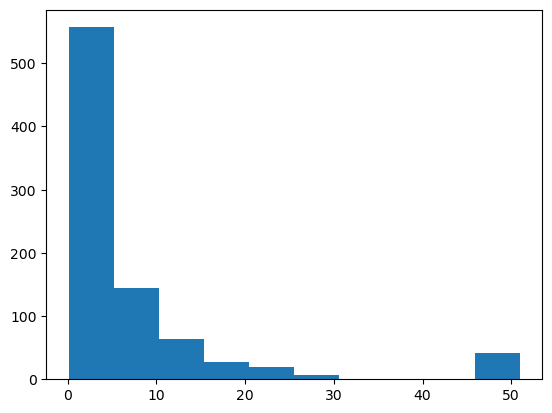

In [65]:
plt.hist(relatedness)